## Name: Shailendr Shrivastav
## Title: Bank Marketing

#### Abstract:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## Potential use case/ applications:
Nowadays, marketing spending in the banking industry is massive, meaning that it is essential for banks to optimize marketing strategies and improve effectiveness. Understanding customers’ need leads to more effective marketing plans, smarter product designs and greater customer satisfaction.

#### Main Objective:
Increase the effectiveness of the bank's telemarketing campaign
This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.

 By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.

#### Libraries used 
1. Numpy for mathematical calculations
2. Pandas for data loading, manipulation
3. Matplotlib for plotting 
4. Seaborn for visualization


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


#Algorithms

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

#Accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [53]:
bm_df = pd.read_csv('bank-additional-full.csv', sep = ';')
bm_df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bm_df.shape

(41188, 21)

In [4]:
bm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

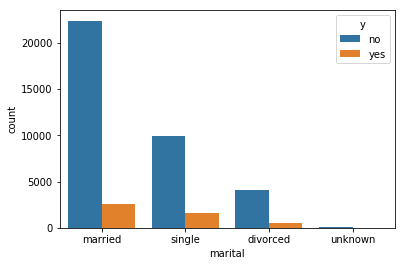

In [5]:
sns.countplot(x='marital',hue='y',data=bm_df)

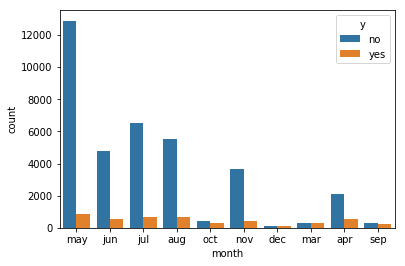

In [6]:
sns.countplot(x='month',hue='y',data=bm_df)

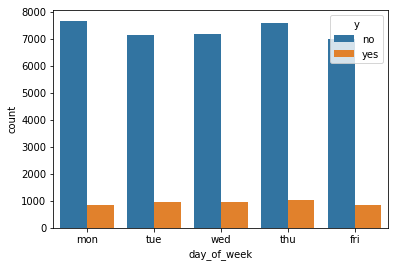

In [7]:
sns.countplot(x='day_of_week',hue='y',data=bm_df)

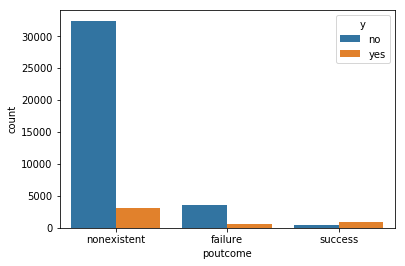

In [8]:
sns.countplot(x='poutcome',hue='y',data=bm_df)

## There are 3 types of data ##
### 1. Bank Client specific ###
### 2.  Other attributes(Marketing) specific ###
### 3.  Social and economic context specific ###

##### First Bank Client data is Processed #####

In [9]:
b_client_df = bm_df.iloc[: , 0:7]
b_client_df.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


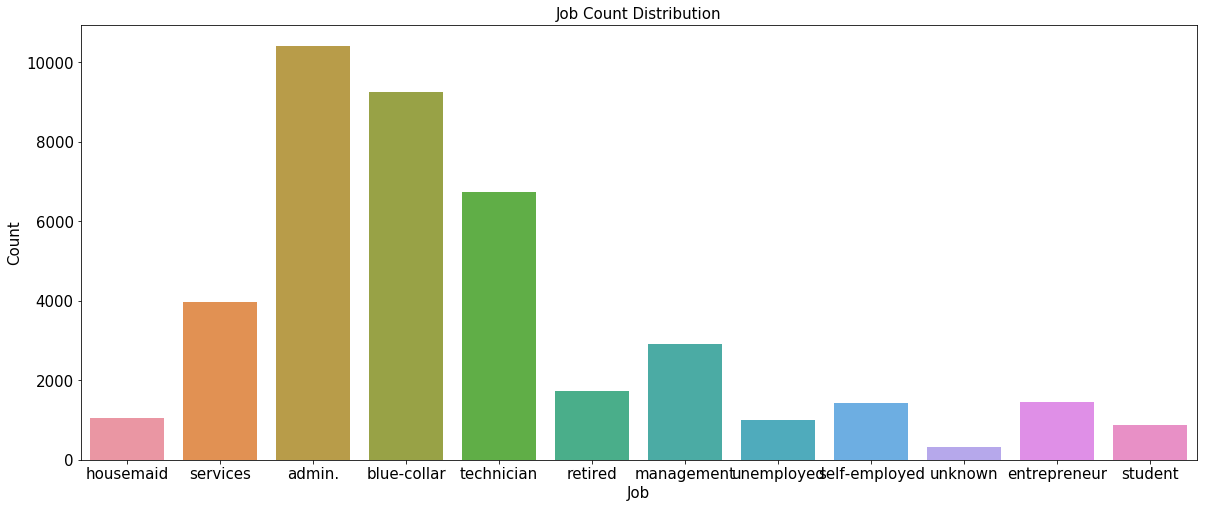

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = b_client_df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

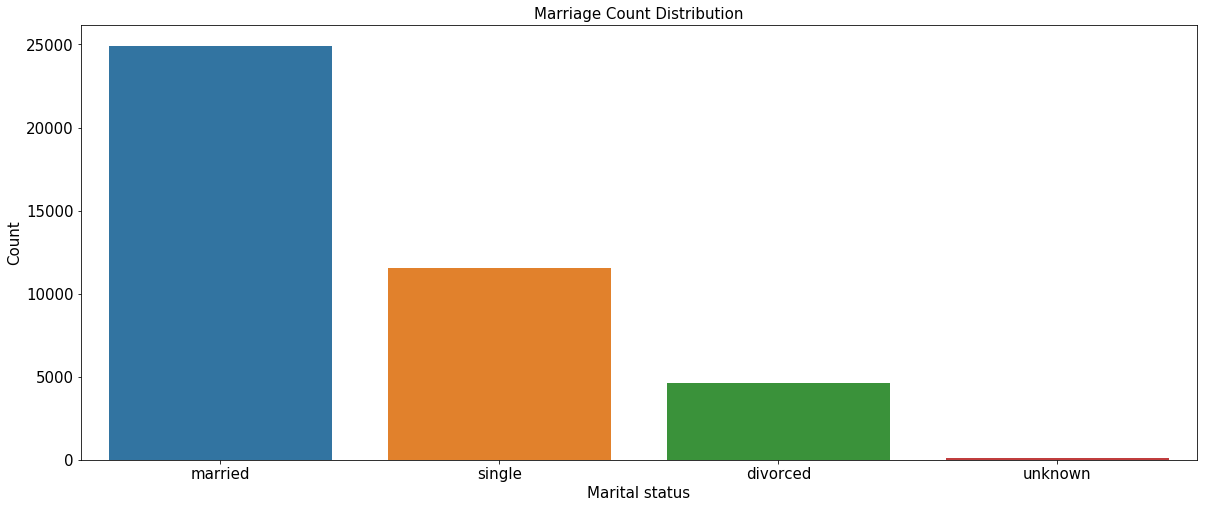

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'marital', data = b_client_df)
ax.set_xlabel('Marital status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marriage Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

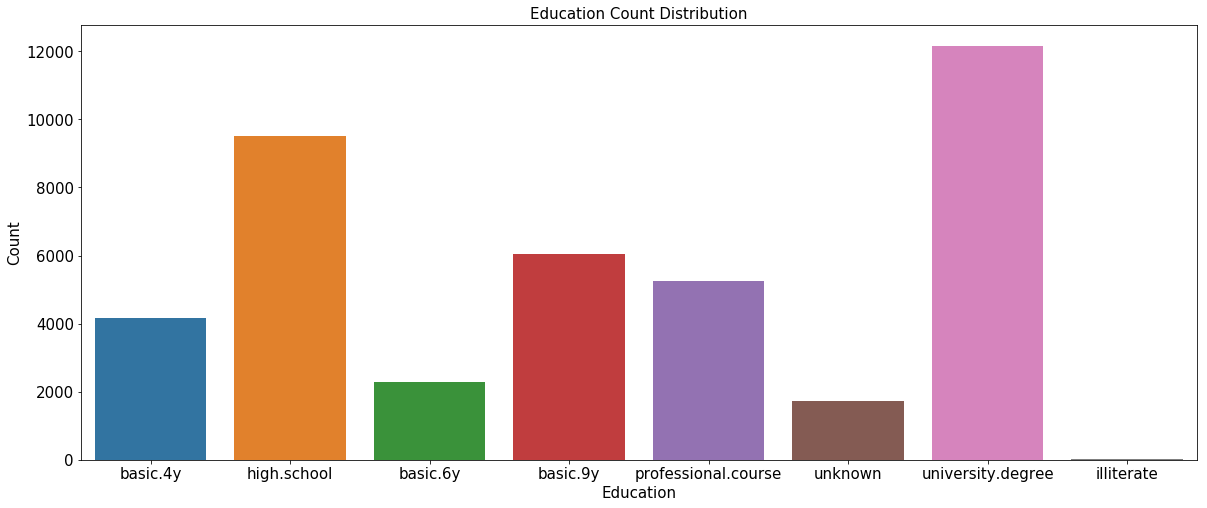

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', data = b_client_df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

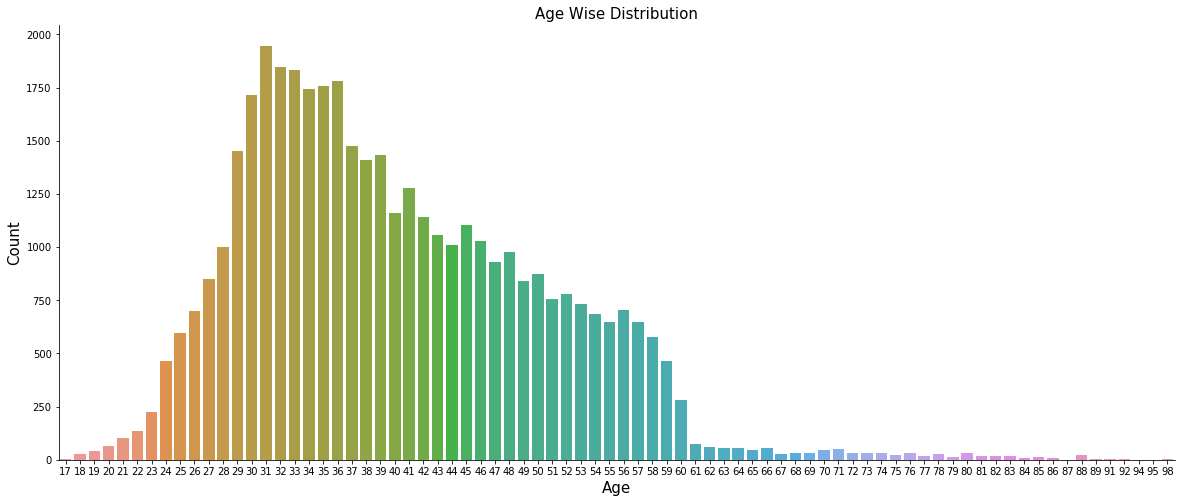

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = b_client_df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Wise Distribution', fontsize=15)
sns.despine()

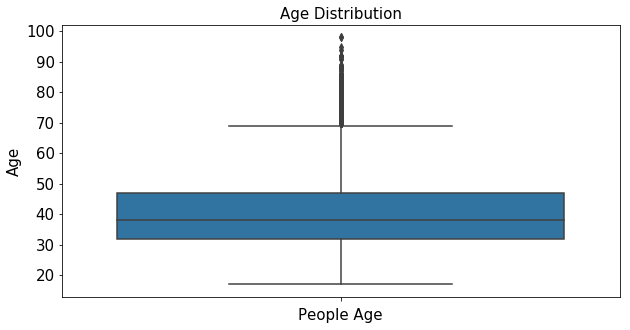

In [14]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
sns.boxplot(x = 'age', data = b_client_df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

In [15]:
# Finding the outliers in age column

Q1=b_client_df['age'].quantile(q = 0.25)
Q2=b_client_df['age'].quantile(q = 0.50)
Q3=b_client_df['age'].quantile(q = 0.75)
Q4=b_client_df['age'].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)


print('Ages above: ', Q3 + 1.5*(IQR), 'are outliers')
print('Ages below: ', Q1 - 1.5*(IQR), 'are outliers')

1st Quartile:  32.0
2nd Quartile:  38.0
3rd Quartile:  47.0
4th Quartile:  98.0
IQR:  15.0
Ages above:  69.5 are outliers
Ages below:  9.5 are outliers


In [16]:
b_client_df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

##### Now other attributes(Marketing) data is processed  #####

In [17]:
# Creating seperate datasets for marketing related data
marketing_df = bm_df.iloc[: , 7:15]
marketing_df.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,may,mon,261,1,999,0,nonexistent
1,telephone,may,mon,149,1,999,0,nonexistent
2,telephone,may,mon,226,1,999,0,nonexistent
3,telephone,may,mon,151,1,999,0,nonexistent
4,telephone,may,mon,307,1,999,0,nonexistent


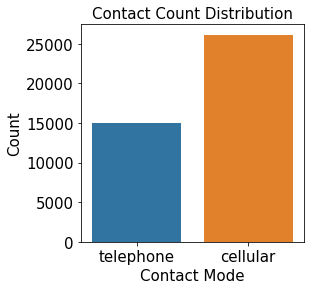

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = 'contact', data = marketing_df)
ax.set_xlabel('Contact Mode', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Contact Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

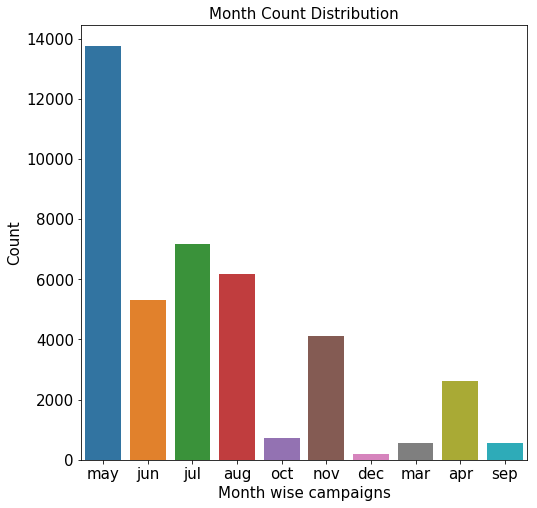

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(x = 'month', data = marketing_df)
ax.set_xlabel('Month wise campaigns', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Month Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

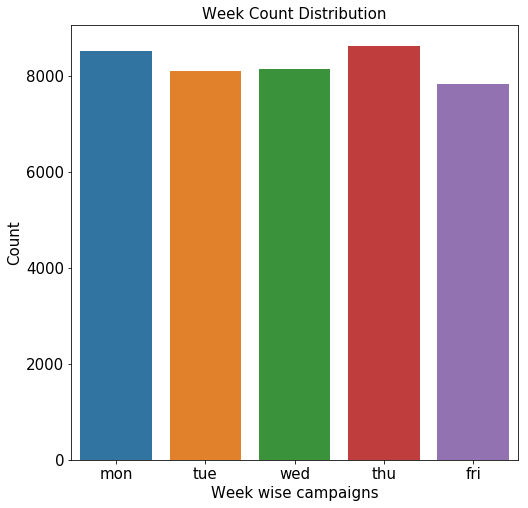

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(x = 'day_of_week', data = marketing_df)
ax.set_xlabel('Week wise campaigns', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Week Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

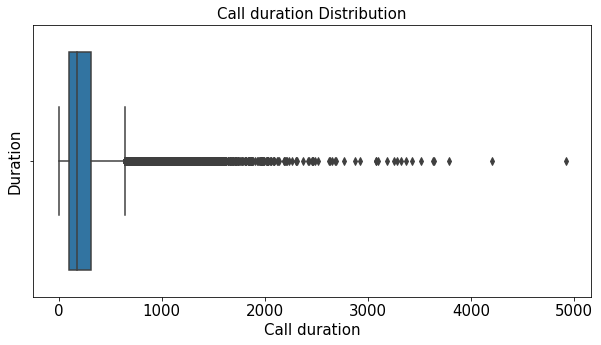

In [21]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
sns.boxplot(x = 'duration', data = marketing_df, orient = 'h', ax = ax1)
ax1.set_xlabel('Call duration', fontsize=15)
ax1.set_ylabel('Duration', fontsize=15)
ax1.set_title('Call duration Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

In [22]:
# finding the outliers in duration column

Q1=marketing_df['duration'].quantile(q = 0.25)
Q2=marketing_df['duration'].quantile(q = 0.50)
Q3=marketing_df['duration'].quantile(q = 0.75)
Q4=marketing_df['duration'].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)


print('Duration above: ', Q3 + 1.5*(IQR), 'are outliers')
print('Duration below: ', Q1 - 1.5*(IQR), 'are outliers')

1st Quartile:  102.0
2nd Quartile:  180.0
3rd Quartile:  319.0
4th Quartile:  4918.0
IQR:  217.0
Duration above:  644.5 are outliers
Duration below:  -223.5 are outliers


In [23]:
# Dividing the duration into buckets

def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration']   = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration']   = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df

duration(marketing_df).head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,may,mon,3,1,999,0,nonexistent
1,telephone,may,mon,2,1,999,0,nonexistent
2,telephone,may,mon,3,1,999,0,nonexistent
3,telephone,may,mon,2,1,999,0,nonexistent
4,telephone,may,mon,3,1,999,0,nonexistent


In [24]:
# Encoding Month

month_index = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 
    'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10,
    'nov':11, 'dec':12}

marketing_df.month=marketing_df.month.map(month_index)
marketing_df.month

0         5
1         5
2         5
3         5
4         5
5         5
6         5
7         5
8         5
9         5
10        5
11        5
12        5
13        5
14        5
15        5
16        5
17        5
18        5
19        5
20        5
21        5
22        5
23        5
24        5
25        5
26        5
27        5
28        5
29        5
         ..
41158    11
41159    11
41160    11
41161    11
41162    11
41163    11
41164    11
41165    11
41166    11
41167    11
41168    11
41169    11
41170    11
41171    11
41172    11
41173    11
41174    11
41175    11
41176    11
41177    11
41178    11
41179    11
41180    11
41181    11
41182    11
41183    11
41184    11
41185    11
41186    11
41187    11
Name: month, Length: 41188, dtype: int64

In [25]:
# as it's datatype is float, it has to be converted into int

marketing_df.month = marketing_df.month.astype(str).astype(int)

In [26]:
# Other attributes (Marketing data)  Correlation

corr=marketing_df.corr()
corr

,month,duration,campaign,pdays,previous
month,1.000000,-0.044550,-0.030635,-0.079556,0.063754
duration,-0.044550,1.000000,-0.116664,-0.075945,0.045537
campaign,-0.030635,-0.116664,1.000000,0.052584,-0.079141
pdays,-0.079556,-0.075945,0.052584,1.000000,-0.587514
previous,0.063754,0.045537,-0.079141,-0.587514,1.000000


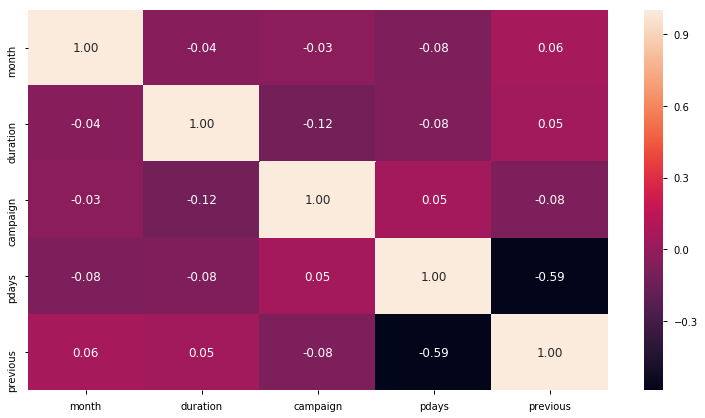

In [27]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13,7))
a = sns.heatmap(corr, annot = True, fmt = ".2f")

###### Label Encoding ######

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
marketing_df['contact'] = le.fit_transform(marketing_df['contact'])
marketing_df['poutcome'] = le.fit_transform(marketing_df['poutcome'])

In [29]:
d_week = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 
    'sat':6, 'sun':7}

marketing_df.day_of_week=marketing_df.day_of_week.map(d_week)

In [30]:
# converting datatype to int

marketing_df['contact'] =marketing_df['contact'].astype(str).astype(int)
marketing_df['month'] =marketing_df['month'].astype(str).astype(int)
marketing_df['day_of_week'] =marketing_df['day_of_week'].astype(str).astype(int)
marketing_df['poutcome'] =marketing_df['poutcome'].astype(str).astype(int)

marketing_df.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,5,1,3,1,999,0,1
1,1,5,1,2,1,999,0,1
2,1,5,1,3,1,999,0,1
3,1,5,1,2,1,999,0,1
4,1,5,1,3,1,999,0,1


##### Now at last Social and economic context data is processed #####

In [31]:
soc_eco_df = bm_df.iloc[: , 15:21]
soc_eco_df.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.1,93.994,-36.4,4.857,5191.0,no
1,1.1,93.994,-36.4,4.857,5191.0,no
2,1.1,93.994,-36.4,4.857,5191.0,no
3,1.1,93.994,-36.4,4.857,5191.0,no
4,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
# correlation of social and economic data

soc_eco_corr=soc_eco_df.corr()
soc_eco_corr

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,0.906970,0.522034,0.100513,0.945154,1.000000


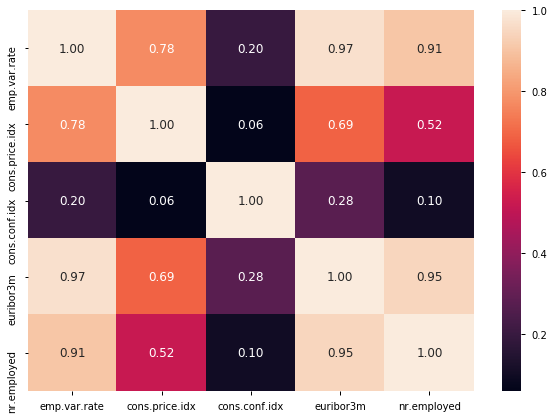

In [33]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (10,7))
a = sns.heatmap(soc_eco_corr, annot = True, fmt = ".2f")

#### High correlation ####
###### From above plot, it can be noticed that euribor3m variable is highly correlated with 3 variables such as emp.var.rate, cons.price.idx & nr.employed variables so we can remove these variables ######

In [34]:
soc_eco_df= soc_eco_df.loc[:, soc_eco_df.columns != 'emp.var.rate']
soc_eco_df= soc_eco_df.loc[:, soc_eco_df.columns != 'cons.price.idx']
soc_eco_df= soc_eco_df.loc[:, soc_eco_df.columns != 'nr.employed']

### Combining all above 3 Data's ###

In [35]:
bm_final_df= pd.concat([b_client_df, marketing_df, soc_eco_df], axis = 1)
bm_final_df.shape

(41188, 18)

In [36]:
bm_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
age              41188 non-null int64
job              41188 non-null object
marital          41188 non-null object
education        41188 non-null object
default          41188 non-null object
housing          41188 non-null object
loan             41188 non-null object
contact          41188 non-null int32
month            41188 non-null int32
day_of_week      41188 non-null int32
duration         41188 non-null int64
campaign         41188 non-null int64
pdays            41188 non-null int64
previous         41188 non-null int64
poutcome         41188 non-null int32
cons.conf.idx    41188 non-null float64
euribor3m        41188 non-null float64
y                41188 non-null object
dtypes: float64(2), int32(4), int64(5), object(7)
memory usage: 5.0+ MB


###  Test Train Split ###

In [37]:
from sklearn.preprocessing import LabelEncoder 
LE = LabelEncoder()
bm_final_df['default'] = LE.fit_transform(bm_final_df['default'])
bm_final_df['housing'] = LE.fit_transform(bm_final_df['housing'])
bm_final_df['loan'] = LE.fit_transform(bm_final_df['loan'])
bm_final_df['y'] = LE.fit_transform(bm_final_df['y'])
bm_final_df['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
bm_final_df['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
bm_final_df['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)

bm_final_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m,y
0,56,1,1,1,0,0,0,1,5,1,3,1,999,0,1,-36.4,4.857,0
1,57,2,1,2,1,0,0,1,5,1,2,1,999,0,1,-36.4,4.857,0
2,37,2,1,2,0,2,0,1,5,1,3,1,999,0,1,-36.4,4.857,0
3,40,3,1,3,0,0,0,1,5,1,2,1,999,0,1,-36.4,4.857,0
4,56,2,1,2,0,0,2,1,5,1,3,1,999,0,1,-36.4,4.857,0


In [38]:
X = bm_final_df.loc[:, bm_final_df.columns != 'y']
Y = bm_final_df.loc[:, bm_final_df.columns == 'y']

In [39]:
#  RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier() 
rf.fit(X, Y) 
rf.score(X, Y)

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

C:\Users\shail\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [40]:
feature_importances.to_csv('feature_importance_4.csv')

##### Based on the feature importance given by random forest, all the variable which gave more than 1% of imporantce are taken #####

#### Separating X and Y ####

In [41]:
bm_final_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')

In [42]:
X = bm_final_df.loc[:, bm_final_df.columns != 'y']
Y = bm_final_df.loc[:, bm_final_df.columns == 'y']

In [43]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.conf.idx', 'euribor3m'],
      dtype='object')

### Splitting the data into Test and Train ###

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

#### Model Selection ###

##### 1. Logistic Regression 
##### 2. Decision Tree
##### 3. Random Forest
##### 4. Support Vector Machines

### Logistic Regression ###

In [54]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

accuracy_lr = round(log_model.score(X_train, y_train) * 100, 2)
print("Accuracy:",round(accuracy_lr,2,), "%")

confusion_matrix_lr = confusion_matrix(y_test, y_pred)
print("Entropy: ", classification_report(y_test, y_pred))

C:\Users\shail\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 90.77 %
Entropy:               precision    recall  f1-score   support

          0       0.93      0.98      0.95     10969
          1       0.66      0.38      0.49      1388

avg / total       0.90      0.91      0.90     12357



### Decision Tree ###



In [55]:
deci_tree = DecisionTreeClassifier()
deci_tree.fit(X_train, y_train)

y_pred = deci_tree.predict(X_test)

accuracy_dt = round(deci_tree.score(X_train, y_train) * 100, 2)
print("Accuracy:",round(accuracy_dt,2,), "%")

confusion_matrix_dt = confusion_matrix(y_test, y_pred)
print("Entropy: ", classification_report(y_test, y_pred))

Accuracy: 99.94 %
Entropy:               precision    recall  f1-score   support

          0       0.94      0.93      0.93     10969
          1       0.48      0.52      0.50      1388

avg / total       0.89      0.88      0.89     12357



### Random Forest ###





In [56]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
accuracy_rf = round(random_forest.score(X_train, y_train) * 100, 2)
print("Accuracy:",round(accuracy_rf,2,), "%")

confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print("Entropy: ", classification_report(y_test, y_pred))

C:\Users\shail\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 99.93 %
Entropy:               precision    recall  f1-score   support

          0       0.94      0.96      0.95     10969
          1       0.63      0.49      0.55      1388

avg / total       0.90      0.91      0.91     12357



### Support Vector Machine (SVM) ###





In [57]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

accuracy_svm = round(linear_svc.score(X_train, y_train) * 100, 2)
print("Accuracy:",round(accuracy_svm,2,), "%")

confusion_matrix_svm = confusion_matrix(y_test, y_pred)
print("Entropy: ", classification_report(y_test, y_pred))

C:\Users\shail\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 89.96 %
Entropy:               precision    recall  f1-score   support

          0       0.91      0.99      0.94     10969
          1       0.63      0.20      0.30      1388

avg / total       0.88      0.90      0.87     12357



In [58]:
# Checking all the results of above model

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 
              'Logistic Regression', 
              'Random Forest', 
              'Decision Tree'],
    'Score': [accuracy_svm, 
              accuracy_lr, 
              accuracy_rf, 
              accuracy_dt]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.94,Decision Tree
99.93,Random Forest
90.77,Logistic Regression
89.96,Support Vector Machines


## ................... Finished .......................